In [1]:
# imports
import torch.nn as nn

In [2]:
# check how looping through layers looks like
conv_layers =  nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),  # (b x 96 x 55 x 55)
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),  # section 3.3
            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 96 x 27 x 27)
            nn.Conv2d(96, 256, 5, padding=2),  # (b x 256 x 27 x 27)
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 256 x 13 x 13)
            nn.Conv2d(256, 384, 3, padding=1),  # (b x 384 x 13 x 13)
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, padding=1),  # (b x 384 x 13 x 13)
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, padding=1),  # (b x 256 x 13 x 13)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 256 x 6 x 6)
        )
for i,layer in enumerate(conv_layers):
    print(i)
    print('---------')
    print(layer)

0
---------
Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
1
---------
ReLU()
2
---------
LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
3
---------
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
4
---------
Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
5
---------
ReLU()
6
---------
LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
7
---------
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
8
---------
Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
9
---------
ReLU()
10
---------
Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
11
---------
ReLU()
12
---------
Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
13
---------
ReLU()
14
---------
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)


In [3]:
#check the 4th later
conv_layers[4]

Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))

In [4]:
#check the 12th later
conv_layers[12]

Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [31]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils import data
import matplotlib.pyplot as plt

In [62]:
# create dataset and data loader
TRAIN_IMG_DIR = '../imagenet-data/imagenette2-160/train'
VAL_IMG_DIR = '../imagenet-data/imagenette2-160/val'
dataset = datasets.ImageFolder(TRAIN_IMG_DIR, 
                               transforms.Compose([transforms.ToTensor()]))

print('Dataset created')

Dataset created


In [63]:
dataset_loader = data.DataLoader(dataset,batch_size=4, shuffle=True,num_workers=8)
print('Dataloader created')

Dataloader created


In [67]:
img, lbl = dataset[9000]

In [68]:
print(img.shape)
print(lbl)

torch.Size([3, 160, 213])
9


Shape post reshape:  torch.Size([160, 213, 3])


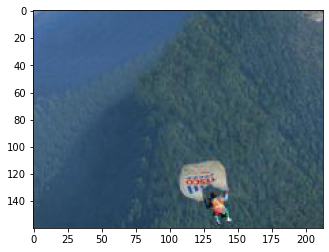

In [69]:
print('Shape post reshape: ',img.permute(1, 2, 0).shape)
plt.imshow(img.permute(1, 2, 0)  )

In [1]:
%load_ext tensorboard

In [6]:
! pwd

/home/jupyter/Learning/paper_implementation/alexnet/notebooks


In [8]:
# %tensorboard --logdir /home/jupyter/Learning/paper_implementation/alexnet/imagenet-data/out/tblogs